### Performing Sentiment Analysis using Text Classification

In [59]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
import pickle
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Avinash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Loading Data

In [61]:
df = pd.read_csv("C:/Users/root2ai - Data.csv")
df.head()

,Text,Target
0,reserve bank forming expert committee based in...,Blockchain
1,director could play role financial system,Blockchain
2,preliminary discuss secure transaction study r...,Blockchain
3,security indeed prove essential transforming f...,Blockchain
4,bank settlement normally take three days based...,Blockchain


In [62]:
df.isnull().sum()

Text      3
Target    0
dtype: int64

In [63]:
df.shape

(22704, 2)

In [64]:
df.dropna(axis=0, how="any", inplace=False).shape

(22701, 2)

In [65]:
df.dropna(axis=0, how='any',inplace=False).isnull().sum()

Text      0
Target    0
dtype: int64

In [66]:
r=df.dropna(axis=0, how='any',inplace=False) 
# https://medium.com/analytics-vidhya/data-cleaning-in-natural-language-processing-1f77ec1f6406

In [67]:
r.isnull().sum()

Text      0
Target    0
dtype: int64

In [68]:
r.shape

(22701, 2)

In [69]:
r.nunique()

Text      20986
Target       11
dtype: int64

In [70]:
x=df['Text']
print(x.value_counts())

billion                                                                                                                                                                                              41
para                                                                                                                                                                                                 31
ncbi                                                                                                                                                                                                 27
retrieved october                                                                                                                                                                                    21
versus                                                                                                                                                                                               17


In [71]:
y=df['Target']
print(y.value_counts())

FinTech             8551
Cyber Security      2640
Bigdata             2267
Reg Tech            2206
credit reporting    1748
Blockchain          1375
Neobanks            1069
Microservices        977
Stock Trading        787
Robo Advising        737
Data Security        347
Name: Target, dtype: int64


In [72]:
r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22701 entries, 0 to 22703
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    22701 non-null  object
 1   Target  22701 non-null  object
dtypes: object(2)
memory usage: 532.1+ KB


In [74]:
r.Target.value_counts()

FinTech             8551
Cyber Security      2640
Bigdata             2267
Reg Tech            2206
credit reporting    1748
Blockchain          1375
Neobanks            1069
Microservices        974
Stock Trading        787
Robo Advising        737
Data Security        347
Name: Target, dtype: int64

In [203]:
r.groupby('Target').count()


,Text
Target,
Bigdata,2267
Blockchain,1375
Cyber Security,2640
Data Security,347
FinTech,8551
Microservices,974
Neobanks,1069
Reg Tech,2206
Robo Advising,737


In [204]:
Target_count['Text']

Target
Bigdata             2267
Blockchain          1375
Cyber Security      2640
Data Security        347
FinTech             8551
Microservices        974
Neobanks            1069
Reg Tech            2206
Robo Advising        737
Stock Trading        787
credit reporting    1748
Name: Text, dtype: int64

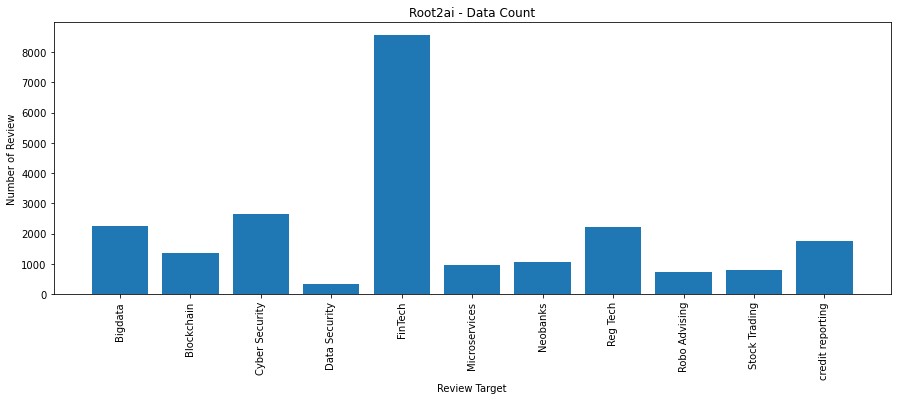

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
Target_count=r.groupby('Target').count()
plt.bar(Target_count.index.values, Target_count['Text'])
plt.xlabel('Review Target')
plt.ylabel('Number of Review')
plt.title('Root2ai - Data Count')
plt.xticks(rotation=90)
plt.show()

### Feature Generation using Bag of Words

In [206]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
# tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range=(1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(r['Text'])

### Split train and test set

In [207]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_text=train_test_split(
    text_counts,r['Target'],test_size=0.3,random_state=1)

In [208]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(15890, 11202)
(6811, 11202)
(15890,)
(6811,)


# Model Building and Evaluation

### 1.1 naive_bayes

In [281]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
nb1= MultinomialNB().fit(x_train,y_train)
nb1

MultinomialNB()

In [287]:
nb1.score(x_train,y_train)

0.47306482064191313

In [288]:
nb1.score(x_test,y_test)

0.3503156658346792

In [291]:
y_pred_nb1 = nb1.predict(x_test)
print(len(y_pred_nb1))
y_pred_nb1

6811


array(['FinTech', 'FinTech', 'FinTech', ..., 'FinTech', 'Blockchain',
       'Bigdata'], dtype='<U16')

In [295]:
metrics.accuracy_score(y_test,y_pred_nb1)

0.3503156658346792

In [278]:
predicted = nb1.predict(x_test)
print('MultinomialNB Accuracy:',metrics.accuracy_score(y_test,predicted))

MultinomialNB Accuracy: 0.3503156658346792


In [296]:
nb1_df=pd.DataFrame({'y_test':y_test,'y_pred_nb1':y_pred_nb1})
nb1_df.head()

,y_test,y_pred_nb1
15821,FinTech,FinTech
12958,FinTech,FinTech
7843,Cyber Security,FinTech
15327,FinTech,FinTech
11160,FinTech,FinTech


In [299]:
nb1_df.groupby(['y_test','y_pred_nb1'])['y_pred_nb1'].count()

y_test            y_pred_nb1      
Bigdata           Bigdata              15
                  Blockchain            4
                  Cyber Security       24
                  Data Security         2
                  FinTech             598
                                     ... 
credit reporting  Neobanks              3
                  Reg Tech              9
                  Robo Advising         1
                  Stock Trading         1
                  credit reporting      5
Name: y_pred_nb1, Length: 96, dtype: int64

In [297]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [302]:
print(confusion_matrix (y_test,y_pred))

[[  15    4   24    2  598    2    4   11    1    1   10]
 [  13    4   11    1  346    6    2   11    0    1    6]
 [  20    9   15    0  718    3    4   12    2    2    9]
 [   3    0    6    1   95    0    0    2    0    0    0]
 [  63   18   82    4 2327    4   10   65    3    4   38]
 [   7    2    7    0  266    4    1    5    0    0    2]
 [  10    4   14    0  262    0    1    7    1    2    4]
 [  13    4   19    0  595    0    2   14    6    2    4]
 [   2    2    7    0  190    1    0    1    0    0    5]
 [   6    0    7    0  223    0    0    1    1    0    5]
 [  16    4   11    0  458    2    3    9    1    1    5]]


In [303]:
print(classification_report (y_test,y_pred))

                  precision    recall  f1-score   support

         Bigdata       0.09      0.02      0.04       672
      Blockchain       0.08      0.01      0.02       401
  Cyber Security       0.07      0.02      0.03       794
   Data Security       0.12      0.01      0.02       107
         FinTech       0.38      0.89      0.54      2618
   Microservices       0.18      0.01      0.03       294
        Neobanks       0.04      0.00      0.01       305
        Reg Tech       0.10      0.02      0.04       659
   Robo Advising       0.00      0.00      0.00       208
   Stock Trading       0.00      0.00      0.00       243
credit reporting       0.06      0.01      0.02       510

        accuracy                           0.35      6811
       macro avg       0.10      0.09      0.07      6811
    weighted avg       0.19      0.35      0.22      6811



In [307]:
metrics.accuracy_score(y_test,y_pred_nb1)

0.3503156658346792

### Feature Generation using TF-IDF

In [221]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf=tf.fit_transform(r['Text'])

### Split train and test set (TF-IDF)

In [218]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, r['Target'], test_size=0.3, random_state=123)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(15890, 11202)
(6811, 11202)
(15890,)
(6811,)


### Model Building and Evaluation (TF-IDF)

#### 1.2 Naive Bayes

In [317]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
nb2= MultinomialNB().fit(X_train,y_train)
nb2

MultinomialNB()

In [318]:
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.5129936866833065


In [331]:
metrics.accuracy_score(y_test,y_pred_nb2)

0.5129936866833065

In [319]:
nb2.score(X_train,y_train)

0.5522970421648836

In [320]:
nb2.score(X_test,y_test)

0.5129936866833065

In [322]:
y_pred_nb2 = nb2.predict(X_test)
print(len(y_pred_nb2))
y_pred_nb2

6811


array(['FinTech', 'FinTech', 'FinTech', ..., 'FinTech', 'FinTech',
       'FinTech'], dtype='<U16')

In [323]:
nb2_df=pd.DataFrame({'y_test':y_test,'y_pred_nb2':y_pred_nb2})
nb2_df.head()

,y_test,y_pred_nb2
15821,FinTech,FinTech
12958,FinTech,FinTech
7843,Cyber Security,FinTech
15327,FinTech,FinTech
11160,FinTech,Cyber Security


In [324]:
nb2_df.groupby(['y_test','y_pred_nb2'])['y_pred_nb2'].count()

y_test            y_pred_nb2      
Bigdata           Bigdata              289
                  Blockchain             1
                  Cyber Security         3
                  FinTech              360
                  Reg Tech              19
Blockchain        Blockchain            20
                  Cyber Security         1
                  FinTech              380
Cyber Security    Cyber Security       172
                  FinTech              620
                  credit reporting       2
Data Security     Cyber Security        12
                  FinTech               95
FinTech           Bigdata                3
                  Cyber Security         9
                  FinTech             2600
                  Reg Tech               2
                  credit reporting       4
Microservices     Cyber Security         2
                  FinTech              287
                  Microservices          5
Neobanks          Cyber Security         1
                  F

In [327]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [328]:
print(confusion_matrix (y_test,y_pred))

[[  15    4   24    2  598    2    4   11    1    1   10]
 [  13    4   11    1  346    6    2   11    0    1    6]
 [  20    9   15    0  718    3    4   12    2    2    9]
 [   3    0    6    1   95    0    0    2    0    0    0]
 [  63   18   82    4 2327    4   10   65    3    4   38]
 [   7    2    7    0  266    4    1    5    0    0    2]
 [  10    4   14    0  262    0    1    7    1    2    4]
 [  13    4   19    0  595    0    2   14    6    2    4]
 [   2    2    7    0  190    1    0    1    0    0    5]
 [   6    0    7    0  223    0    0    1    1    0    5]
 [  16    4   11    0  458    2    3    9    1    1    5]]


In [329]:
print(classification_report (y_test,y_pred))

                  precision    recall  f1-score   support

         Bigdata       0.09      0.02      0.04       672
      Blockchain       0.08      0.01      0.02       401
  Cyber Security       0.07      0.02      0.03       794
   Data Security       0.12      0.01      0.02       107
         FinTech       0.38      0.89      0.54      2618
   Microservices       0.18      0.01      0.03       294
        Neobanks       0.04      0.00      0.01       305
        Reg Tech       0.10      0.02      0.04       659
   Robo Advising       0.00      0.00      0.00       208
   Stock Trading       0.00      0.00      0.00       243
credit reporting       0.06      0.01      0.02       510

        accuracy                           0.35      6811
       macro avg       0.10      0.09      0.07      6811
    weighted avg       0.19      0.35      0.22      6811



In [330]:
metrics.accuracy_score(y_test,y_pred_nb2)

0.5129936866833065

## 2. Classification (Logistic Regression)

In [232]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\Avinash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [233]:
# accuracy score for training data
lr.score(X_train,y_train)

0.7479546884833228

In [234]:
y_pred = lr.predict(X_test)
len(y_pred)

6811

In [235]:
# accuracy score for testing data
lr.score(X_test,y_test)

0.6446924093378359

In [236]:
lr_df=pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
lr_df.head()

,y_test,y_pred
15821,FinTech,FinTech
12958,FinTech,FinTech
7843,Cyber Security,FinTech
15327,FinTech,FinTech
11160,FinTech,Bigdata


In [237]:
lr_df.groupby(['y_test','y_pred'])['y_pred'].count()

y_test            y_pred          
Bigdata           Bigdata             447
                  Blockchain            4
                  Cyber Security        3
                  FinTech             183
                  Microservices         2
                                     ... 
credit reporting  Neobanks              5
                  Reg Tech              1
                  Robo Advising         1
                  Stock Trading         1
                  credit reporting    269
Name: y_pred, Length: 89, dtype: int64

#### Confusion Matrix

In [241]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 447,    4,    3,    0,  183,    2,    1,   25,    1,    1,    5],
       [   5,  128,   12,    0,  248,    1,    2,    2,    0,    1,    2],
       [   8,   10,  402,    6,  338,    9,    3,    5,    0,    0,   13],
       [   5,    0,   30,    6,   57,    1,    0,    0,    0,    0,    8],
       [  24,   17,   67,    0, 2403,   13,   19,    9,   19,   12,   35],
       [   6,    3,    8,    0,  172,  103,    1,    0,    0,    1,    0],
       [   3,    1,    2,    0,  245,    1,   47,    0,    0,    0,    6],
       [  31,    3,   13,    0,  160,    0,    2,  445,    1,    0,    4],
       [   3,    0,    9,    0,  149,    0,    3,    0,   42,    0,    2],
       [   5,    0,    4,    0,  132,    1,    0,    1,    0,   99,    1],
       [  14,    8,   20,    1,  190,    0,    5,    1,    1,    1,  269]],
      dtype=int64)

#### Classification Report

In [242]:
from sklearn.metrics import classification_report
print(classification_report (y_test,y_pred))

                  precision    recall  f1-score   support

         Bigdata       0.81      0.67      0.73       672
      Blockchain       0.74      0.32      0.45       401
  Cyber Security       0.71      0.51      0.59       794
   Data Security       0.46      0.06      0.10       107
         FinTech       0.56      0.92      0.70      2618
   Microservices       0.79      0.35      0.48       294
        Neobanks       0.57      0.15      0.24       305
        Reg Tech       0.91      0.68      0.78       659
   Robo Advising       0.66      0.20      0.31       208
   Stock Trading       0.86      0.41      0.55       243
credit reporting       0.78      0.53      0.63       510

        accuracy                           0.64      6811
       macro avg       0.71      0.43      0.51      6811
    weighted avg       0.69      0.64      0.62      6811



#### accuracy_score

In [304]:
print(accuracy_score (y_test,y_pred))

0.3503156658346792


### 3. Random  Forest  Classifier  

In [244]:
from sklearn.ensemble import RandomForestClassifier

In [245]:
rfc = RandomForestClassifier(n_estimators=10,max_depth=5,
                                max_features='sqrt',min_samples_split=20)

In [246]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_split=20,
                       n_estimators=10)

In [247]:
rfc.score(X_train,y_train)

0.3761485210824418

In [248]:
rfc.fit(X_test,y_test)

RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_split=20,
                       n_estimators=10)

In [249]:
rfc.score(X_test,y_test)

0.3887828512700044

In [250]:
y_pred_rfc = rfc.predict(X_test)
y_pred_rfc

array(['FinTech', 'FinTech', 'FinTech', ..., 'FinTech', 'FinTech',
       'FinTech'], dtype=object)

In [251]:
confusion_matrix(y_test,y_pred_rfc)

array([[   0,    0,    0,    0,  671,    0,    0,    1,    0,    0,    0],
       [   0,    0,    0,    0,  401,    0,    0,    0,    0,    0,    0],
       [   0,    0,    1,    0,  793,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,  107,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 2617,    0,    0,    0,    0,    0,    1],
       [   0,    0,    0,    0,  294,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,  305,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,  641,    0,    0,   18,    0,    0,    0],
       [   0,    0,    0,    0,  208,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,  243,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,  498,    0,    0,    0,    0,    0,   12]],
      dtype=int64)

In [272]:
print(classification_report(y_test,y_pred_rfc))

C:\Users\Avinash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

         Bigdata       0.00      0.00      0.00       672
      Blockchain       0.00      0.00      0.00       401
  Cyber Security       1.00      0.00      0.00       794
   Data Security       0.00      0.00      0.00       107
         FinTech       0.39      1.00      0.56      2618
   Microservices       0.00      0.00      0.00       294
        Neobanks       0.00      0.00      0.00       305
        Reg Tech       0.95      0.03      0.05       659
   Robo Advising       0.00      0.00      0.00       208
   Stock Trading       0.00      0.00      0.00       243
credit reporting       0.92      0.02      0.05       510

        accuracy                           0.39      6811
       macro avg       0.30      0.10      0.06      6811
    weighted avg       0.43      0.39      0.22      6811



In [274]:
from sklearn.metrics import accuracy_score
print('Accyracy',accuracy_score(y_test,y_pred_rfc))

Accyracy 0.3887828512700044


### 4. Decision Tree

In [257]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [258]:
print(dt.score(X_train,y_train))
print(dt.score(X_test,y_test))

0.9928256765261171
0.5463221259726913


In [259]:
y_pred_dt = dt.predict(X_test)
y_pred_dt

array(['FinTech', 'FinTech', 'FinTech', ..., 'FinTech', 'FinTech',
       'FinTech'], dtype=object)

In [260]:
confusion_matrix(y_test,y_pred_dt)

array([[ 459,    6,   14,    6,  113,    6,    3,   36,    4,    3,   22],
       [  24,  138,   30,    2,  154,   12,    5,   12,    5,   10,    9],
       [  37,   38,  333,   17,  274,   14,   10,   18,   20,    5,   28],
       [  15,    2,   27,   15,   32,    3,    2,    4,    0,    1,    6],
       [ 181,  107,  178,   20, 1723,   59,   71,   50,   80,   48,  101],
       [  19,   22,   13,    1,  118,   96,    5,    9,    5,    2,    4],
       [  12,    9,   17,    3,  154,    4,   80,    5,   10,    3,    8],
       [  80,    7,   29,    1,   88,    2,    5,  438,    4,    2,    3],
       [  15,    7,    8,    0,   89,    5,    8,    4,   60,    5,    7],
       [  20,    3,    6,    0,   88,    5,    4,    3,    2,  107,    5],
       [  33,   14,   20,    3,  115,    8,   20,   10,    6,    9,  272]],
      dtype=int64)

In [261]:
print(classification_report(y_test,y_pred_dt))

                  precision    recall  f1-score   support

         Bigdata       0.51      0.68      0.59       672
      Blockchain       0.39      0.34      0.37       401
  Cyber Security       0.49      0.42      0.45       794
   Data Security       0.22      0.14      0.17       107
         FinTech       0.58      0.66      0.62      2618
   Microservices       0.45      0.33      0.38       294
        Neobanks       0.38      0.26      0.31       305
        Reg Tech       0.74      0.66      0.70       659
   Robo Advising       0.31      0.29      0.30       208
   Stock Trading       0.55      0.44      0.49       243
credit reporting       0.58      0.53      0.56       510

        accuracy                           0.55      6811
       macro avg       0.47      0.43      0.45      6811
    weighted avg       0.54      0.55      0.54      6811



In [262]:
print(accuracy_score(y_test,y_pred_dt))

0.5463221259726913


#### 5. K- Nearest Neighbor 

In [343]:
from sklearn.neighbors import KNeighborsClassifier

In [344]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train,y_train)
#knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=21)

In [345]:
knn.score(X_train,y_train)

0.6269981120201384

In [346]:
print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))

0.6269981120201384
0.5809719571281751


In [353]:
y_pred_knn = knn.predict(X_test)  # numpy
y_pred_knn

array(['FinTech', 'FinTech', 'FinTech', ..., 'Neobanks', 'FinTech',
       'FinTech'], dtype=object)

In [356]:
nb2_df=pd.DataFrame({'y_test':y_test,'y_pred_nb2':y_pred_nb2})
nb2_df.head()

,y_test,y_pred_nb2
15821,FinTech,FinTech
12958,FinTech,FinTech
7843,Cyber Security,FinTech
15327,FinTech,FinTech
11160,FinTech,Cyber Security


In [358]:
nb2_df.groupby(['y_test','y_pred_nb2'])['y_pred_nb2'].count()
nb2_df.head()

,y_test,y_pred_nb2
15821,FinTech,FinTech
12958,FinTech,FinTech
7843,Cyber Security,FinTech
15327,FinTech,FinTech
11160,FinTech,Cyber Security


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [363]:
print(confusion_matrix (y_test,y_pred_nb2))

[[ 289    1    3    0  360    0    0   19    0    0    0]
 [   0   20    1    0  380    0    0    0    0    0    0]
 [   0    0  172    0  620    0    0    0    0    0    2]
 [   0    0   12    0   95    0    0    0    0    0    0]
 [   3    0    9    0 2600    0    0    2    0    0    4]
 [   0    0    2    0  287    5    0    0    0    0    0]
 [   0    0    1    0  303    0    0    0    0    0    1]
 [  12    1    9    0  268    0    0  369    0    0    0]
 [   0    0    2    0  206    0    0    0    0    0    0]
 [   1    0    1    0  231    0    0    0    0   10    0]
 [   0    0   10    0  471    0    0    0    0    0   29]]


In [364]:
print(classification_report (y_test,y_pred_nb2))

C:\Users\Avinash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

         Bigdata       0.95      0.43      0.59       672
      Blockchain       0.91      0.05      0.09       401
  Cyber Security       0.77      0.22      0.34       794
   Data Security       0.00      0.00      0.00       107
         FinTech       0.45      0.99      0.62      2618
   Microservices       1.00      0.02      0.03       294
        Neobanks       0.00      0.00      0.00       305
        Reg Tech       0.95      0.56      0.70       659
   Robo Advising       0.00      0.00      0.00       208
   Stock Trading       1.00      0.04      0.08       243
credit reporting       0.81      0.06      0.11       510

        accuracy                           0.51      6811
       macro avg       0.62      0.21      0.23      6811
    weighted avg       0.64      0.51      0.42      6811



In [369]:
metrics.accuracy_score(y_test,y_pred_nb2)

0.5129936866833065